In [2]:
# Import required Libraries  

import pandas as pd 

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')


# Dataset Overview

In [3]:
df = pd.read_csv("bitcoin.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Data Cleaning

In [6]:
df[["Year" , "Month" , "Day"]]  = df['Date'].str.split('-' , expand = True )

In [7]:
df[['Year','Month', 'Day']] = df[['Year','Month', 'Day']].astype(int)

In [8]:
df.drop(['Adj Close'] , inplace = True  , axis = 1)

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


# EDA

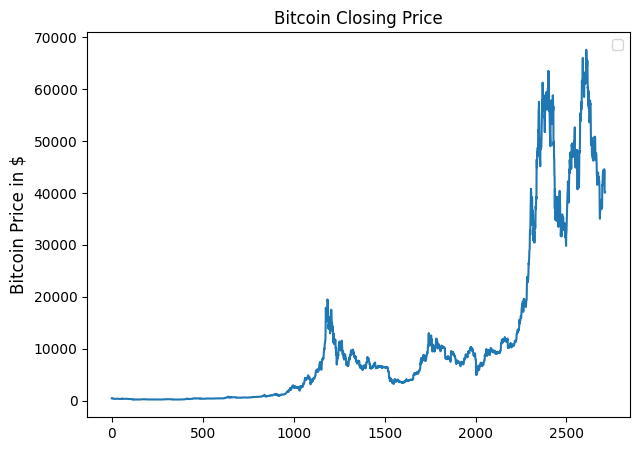

In [10]:
plt.figure(figsize = (7 , 5))
plt.plot(df['Close'])
plt.ylabel("Bitcoin Price in $" , fontsize = 12)
plt.title("Bitcoin Closing Price")
plt.legend()
plt.show()

In [11]:
#Understanding the correlations 

numbered_columns = df.select_dtypes(include = 'number').corr()

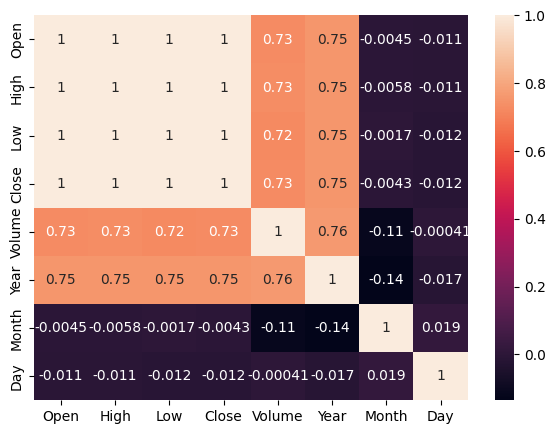

In [12]:
plt.figure(figsize = (7 , 5))
sns.heatmap(numbered_columns , annot = True)
plt.show()

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')

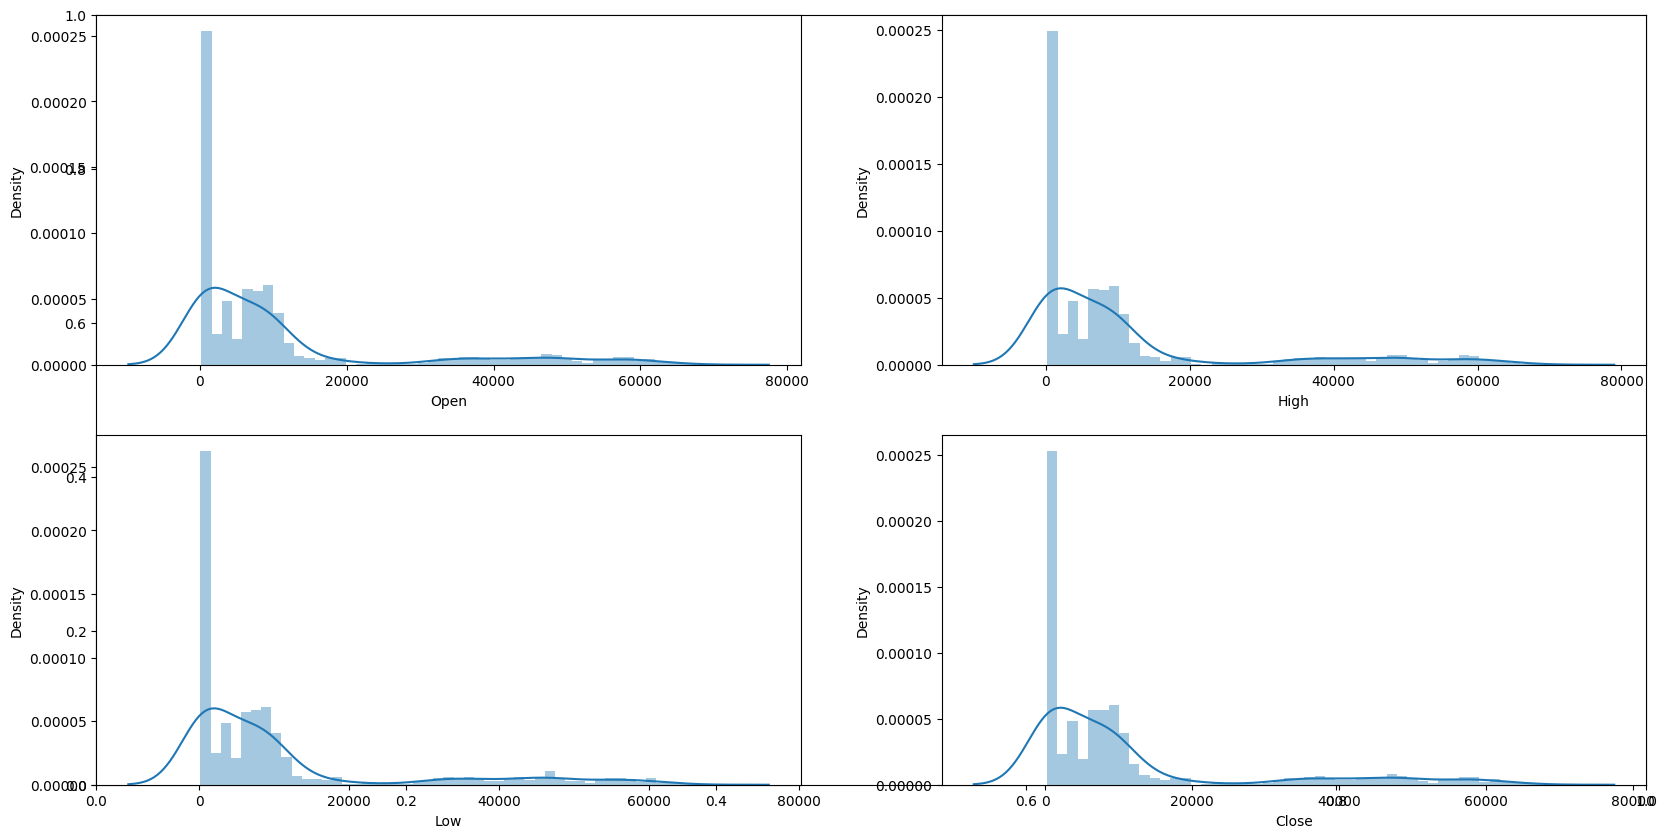

In [14]:
#Understanding the distributions of price 

imp_data = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize = (20,10))

for i,col in enumerate(imp_data):
    plt.subplot(2 ,2, i+1)
    sns.distplot(df[col])
plt.show()



In [15]:
df['Date'] = pd.to_datetime(df['Date']) 

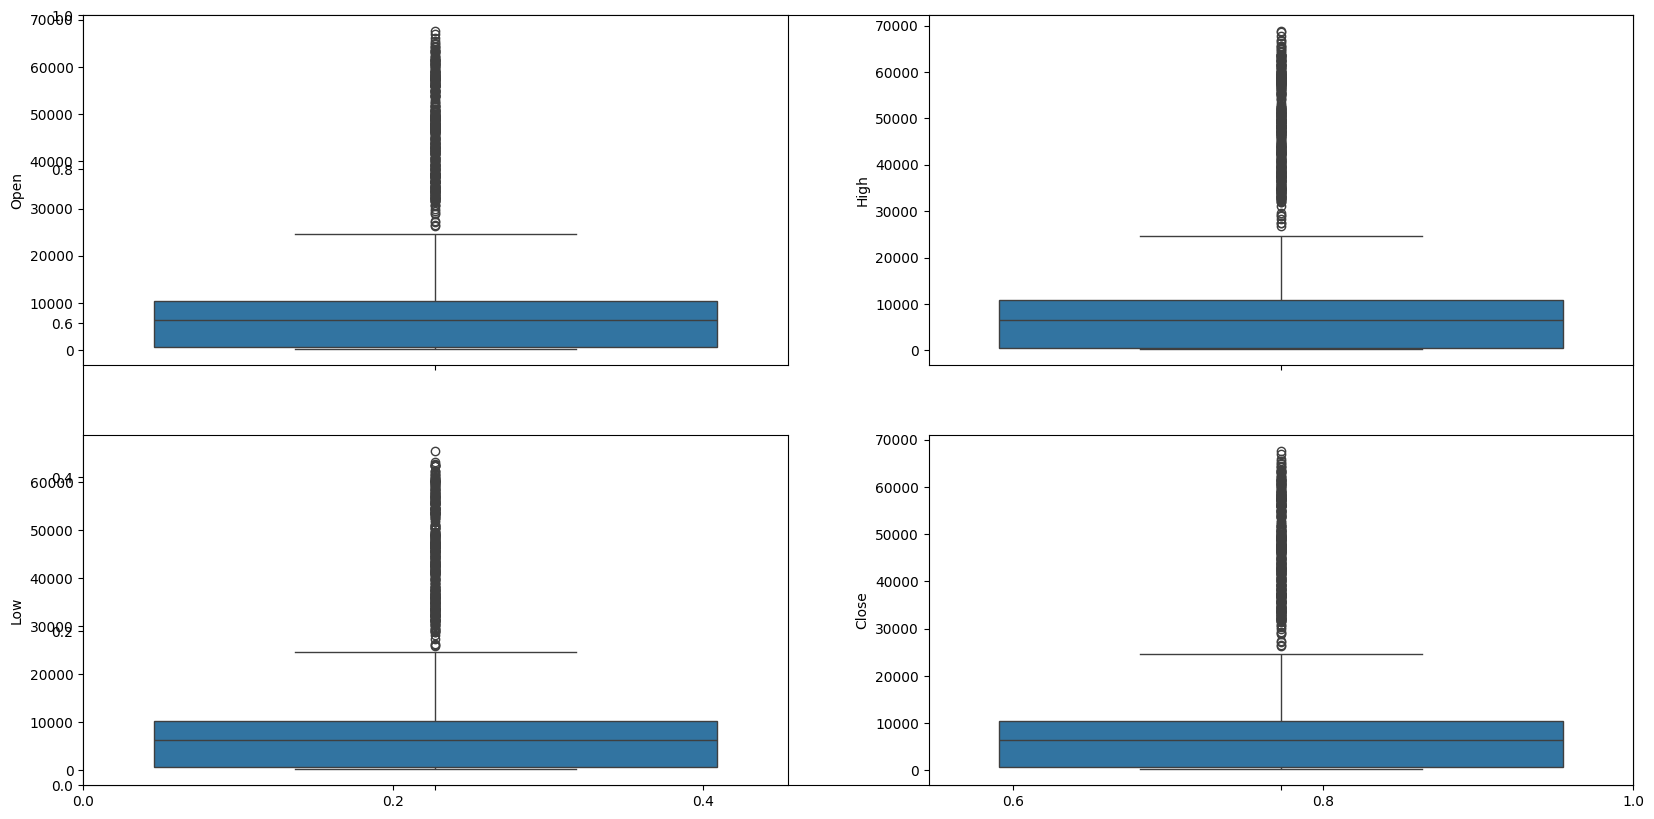

In [17]:
# checking for outliers

plt.subplots(figsize = (20 , 10))

for i , col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2 , 2, i+1)
    sns.boxplot(df[col])
plt.show()

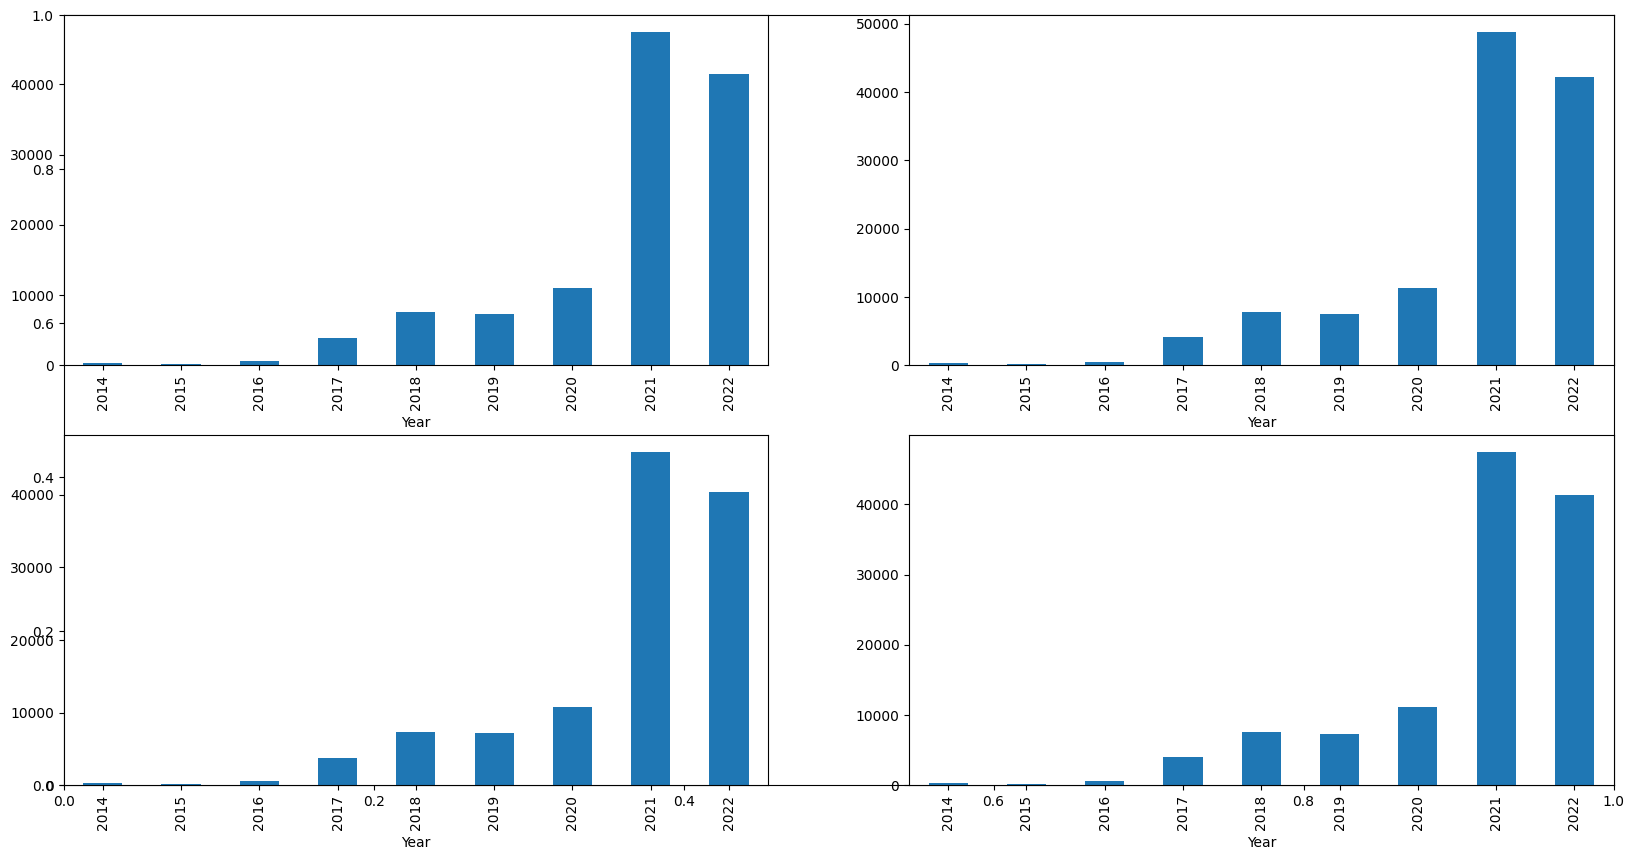

In [16]:
grouped = df.groupby("Year").mean()


plt.subplots(figsize = (20,10))

for i,col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2 ,2, i+1)
    grouped[col].plot.bar()
plt.show()



In [18]:
df['is_quarter_end'] = np.where(df['Month']%3 == 0 , 1 , 0 )

In [19]:
df.head()
# df.columns
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [20]:
df["open-close"] = df['Open'] - df["Close"]
df["low-high"] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'] , 1 , 0)


In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


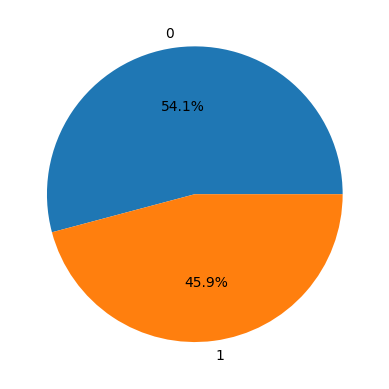

In [22]:
pies = df["target"].value_counts().values

plt.pie(df["target"].value_counts() ,  labels = df["target"].unique() ,autopct='%1.1f%%')
plt.show()

# Model Training 

In [23]:
X = df[["is_quarter_end"	,"open-close"	,"low-high"]]
y = df["target"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2713 non-null   datetime64[ns]
 1   Open            2713 non-null   float64       
 2   High            2713 non-null   float64       
 3   Low             2713 non-null   float64       
 4   Close           2713 non-null   float64       
 5   Volume          2713 non-null   int64         
 6   Year            2713 non-null   int64         
 7   Month           2713 non-null   int64         
 8   Day             2713 non-null   int64         
 9   is_quarter_end  2713 non-null   int64         
 10  open-close      2713 non-null   float64       
 11  low-high        2713 non-null   float64       
 12  target          2713 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 275.7 KB


In [24]:
scales = StandardScaler()
X = scales.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state=42 , test_size=0.3)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1899, 3)
(814, 3)
(1899,)
(814,)


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [28]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

In [29]:
for i in range(3):
    models[i].fit(X_train , y_train)

    print(models[i] , ":")
    print("Training Accuracy : " , metrics.roc_auc_score(y_train , models[i].predict(X_train)))
    print("test Accuracy : " , metrics.roc_auc_score(y_test , models[i].predict(X_test)))
    print()



LogisticRegression() :
Training Accuracy :  0.5147282913040278
test Accuracy :  0.5007867388758782

SVC(kernel='poly', probability=True) :
Training Accuracy :  0.5084752096631334
test Accuracy :  0.5017686377829821

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) :
Training Accuracy :  

# NOTES ----------------

XGBClassifier: We cannot consider the XGBClassifier because, as we can see, the accuracy on the training data is high, while the accuracy on the test data is very low. This indicates overfitting.

SVC and Logistic Regression: Both show somewhat similar accuracy values for both training and test data, suggesting that they are more balanced and not overfitting.
